# DS-SF-36 | Final Project | Exploratory Data Analysis

In [206]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Project Problem and Hypothesis

What's the project about? 

My mom, among others, maintains the unscientific view that full moons cause people to act strangely. I don’t believe this, but I can’t help but wonder whether she and her lunatic fringe are onto something. I’d like to prove or disprove that full moons are correlated with odd human behavior, to increase my own confidence; and either increase or decrease lunatics’ reliance on celestial bodies as explanations for real world events.

# Datasets

I've concatenated a few datasets:
Dates of a) new moons, b) first quarter moons, c) full moons, d) last quarter moons occurring in PST; from 01/02/2003 to 7/23/2017. I forget where I found this dataset. I've coded these to 1, 2, 3 and 4, respectively. I wrangled the data such that days between 1 and 2 increment up at normal intervals.

Daily SF crime data from 01/02/2003 to 7/23/2017. Columns includes suspicious_occurrences, battery, missing_person, breaking_windows, prostitution, disorderly_conduct, runaways, traffic_violation, embezzlement. The city of San Francisco provides these datasets.

# Domain knowledge

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1444800/
https://www.washingtonpost.com/news/speaking-of-science/wp/2016/10/24/dear-science-does-a-full-moon-really-change-human-behavior/?utm_term=.6ce9f6ea7bf1
https://www.theguardian.com/science/2011/dec/23/moon-full-p-value-statistics


# Project Concerns

What questions do you have about your project? What are you not sure you quite yet understand? (The more honest you are about this, the easier your instructors can help)
What are the assumptions and caveats to the problem?
What data do you not have access to but wish you had?
What is already implied about the observations in your data set? For example, if your primary data set is twitter data, it may not be representative of the whole sample. (say, predicting who would win an election)
What are the risks to the project?
What's the cost of your model being wrong? (What's the benefit of your model being right?)
Is any of the data incorrect? Could it be incorrect?

# Outcomes

What do you expect the output to look like?
What does your target audience expect the output to look like?
What gain do you expect from your most important feature on its own?
How complicated does your model have to be?
How successful does your project have to be in order to be considered a "success"?
What will you do if the project is a bust (this happens! but it shouldn't here)?

# Exploratory Analysis Writeup

# Requirements

At least one visual for each independent variable and, if possible, its relationship to your dependent variable.
It's just as important to show what's not correlated as it is to show any actual correlations found.
Visuals should be well labeled and intuitive based on the data types.
For example, if your x variable is temperature and y is "did it rain," a reasonable visual would be two histograms of temperature, one where it rained, and one where it didn't.
Tables are a perfectly valid visualization tool! Interweave them into your work.
Provide insight about dataset and its impact on your hypothesis.

In [220]:
df = pd.read_csv(os.path.join('lunacy_analysis - master (3).csv'))

In [208]:
df

,date,day_of_week,major_stage,pst_moon,suspicious_occurrences,battery,missing_person,breaking_windows,prostitution,disorderly_conduct,runaways,traffic_violation,embezzlement
0,01/02/2003,Thursday,New Moon,1.00,10,9,22,0,10,1,2,8,0
1,01/03/2003,Friday,new_first_a,1.13,11,15,14,1,14,5,3,16,1
2,01/04/2003,Saturday,new_first_a,1.25,7,14,7,0,1,2,1,11,0
3,01/05/2003,Sunday,new_first_a,1.38,9,14,9,0,1,2,0,9,0
4,01/06/2003,Monday,new_first_b,1.50,11,12,12,0,10,0,0,12,1
5,01/07/2003,Tuesday,new_first_b,1.63,11,17,10,1,6,2,0,17,0
6,01/08/2003,Wednesday,new_first_b,1.75,7,19,17,1,12,12,3,17,2
7,01/09/2003,Thursday,new_first_b,1.88,8,15,8,2,10,2,3,8,2
8,01/10/2003,Friday,First Quarter,2.00,11,12,6,1,0,2,0,15,0
9,01/11/2003,Saturday,first_full_a,2.13,9,14,9,0,1,1,2,7,0


In [209]:
aggregated_df_mean = df[ ['day_of_week', 'major_stage', 'battery', 'disorderly_conduct','breaking_windows','suspicious_occurrences', 'missing_person', 'runaways', 'prostitution' 
                ] ].\
    groupby(['major_stage']).mean()

In [210]:
aggregated_df_mean

,battery,disorderly_conduct,breaking_windows,suspicious_occurrences,missing_person,runaways,prostitution
major_stage,,,,,,,
First Quarter,9.161111,1.000000,1.288889,9.650000,9.283333,0.438889,2.355556
Full Moon,9.850000,0.961111,1.366667,9.450000,9.627778,0.383333,2.300000
Last Quarter,9.105556,0.850000,1.494444,10.066667,9.894444,0.377778,2.388889
New Moon,9.233333,0.922222,1.272222,9.527778,9.122222,0.377778,2.383333
first_full_a,9.354167,1.145833,1.431818,9.284091,9.060606,0.465909,2.121212
first_full_b,9.292135,1.008026,1.345104,9.566613,9.292135,0.470305,2.134831
full_last_a,9.096226,0.894340,1.313208,9.507547,9.350943,0.471698,1.754717
full_last_b,9.448220,0.969256,1.297735,9.296117,9.477346,0.449838,2.239482
last_new_a,9.065913,0.956685,1.333333,9.459510,9.525424,0.485876,2.229755


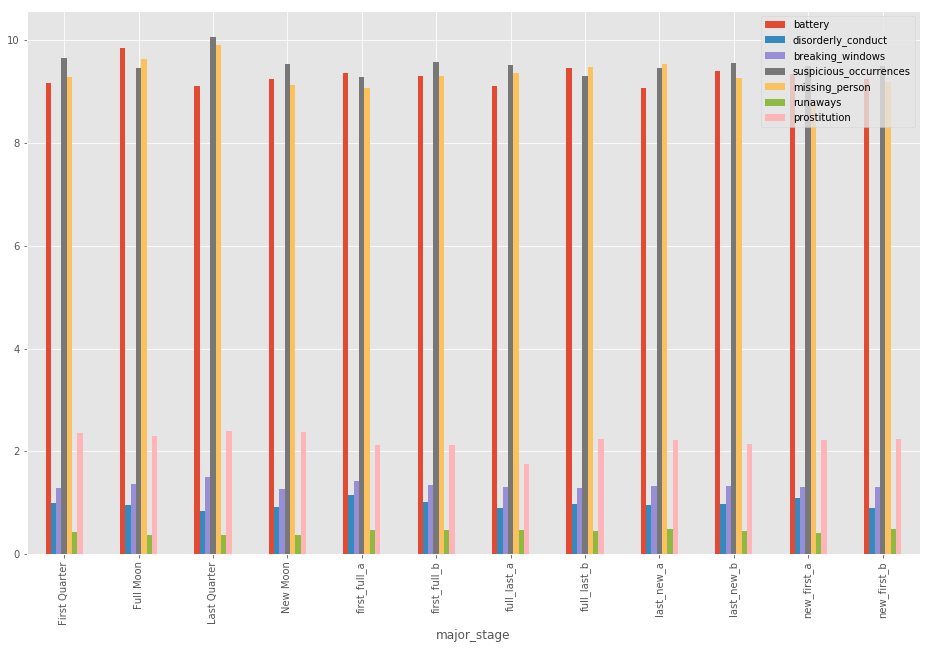

In [211]:
aggregated_df_mean.plot(kind = 'bar', figsize = (16, 10))